## Capstone Project

### Sales Forecasting

#### Problem statement:
##### Fresh Analytics, a data analytics company, aims to comprehend and predict the demand for various items across restaurants. To accurately forecast the sales of items across 
##### different restaurants over the years, enabling better decision-making and planning.


### Import python library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

### Load Resturants dataset

In [2]:
#Resturants list

print('Resturants list')
df_resturants_data = pd.read_csv('resturants.csv')
print(df_resturants_data.head())

#Resturants item list
print('\n')
print('Resturants items list')
df_items_data = pd.read_csv('items.csv')
print(df_items_data.head())

#Resturants sales

print('\n')
print('Resturants sales list')
df_sales_data = pd.read_csv('sales.csv')
print(df_sales_data.head())

Resturants list
   id            name
0   1     Bob's Diner
1   2  Beachfront Bar
2   3     Sweet Shack
3   4        Fou Cher
4   5     Corner Cafe


Resturants items list
   id  store_id                               name  kcal   cost
0   1         4                     Chocolate Cake   554   6.71
1   2         4  Breaded Fish with Vegetables Meal   772  15.09
2   3         1                  Sweet Fruity Cake   931  29.22
3   4         1    Amazing Steak Dinner with Rolls   763  26.42
4   5         5                          Milk Cake   583   6.07


Resturants sales list
         date  item_id  item_count   price
0  01-01-2019        3           2   58.44
1  01-01-2019        4          22  581.24
2  01-01-2019       12           7   34.09
3  01-01-2019       13          12   50.16
4  01-01-2019       16         136  436.56


#### Check sales data overview : null value, rows / column count, data types, etc.

In [3]:
#Checking null records and found no null records in th datataset
df_sales_data.isnull().sum()

date          0
item_id       0
item_count    0
price         0
dtype: int64

In [4]:
#Check data type and null type
print(df_sales_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109600 entries, 0 to 109599
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        109600 non-null  object 
 1   item_id     109600 non-null  int64  
 2   item_count  109600 non-null  int64  
 3   price       109600 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ MB
None


In [5]:
#Access the first row data by using iloc

print(df_sales_data.iloc[0])

date          01-01-2019
item_id                3
item_count             2
price              58.44
Name: 0, dtype: object


#### Showing Resturant Sales Date, Item and Price wise Groupby

In [6]:
df_sales_data[['date', 'item_id','item_count', 'price']].groupby(['date','item_count','item_id']).mean()

price
date       item_count item_id         
01-01-2019 0          1           0.00
                      2           0.00
                      5           0.00
                      6           0.00
                      7           0.00
...                                ...
31-12-2021 54         59       1261.98
           70         76       1255.10
           85         9         332.35
           119        38       1285.20
           301        19        869.89

[109600 rows x 1 columns]

#### Dealing with Outliers data 

In [7]:
#Copy of original dataset
df_sales_data_Outlier = df_sales_data.copy()

#Check statistical values for all numerical columns value
df_sales_data_Outlier.describe()

,item_id,item_count,price
count,109600.000000,109600.000000,109600.000000
mean,50.500000,6.339297,58.428271
std,28.866202,30.003728,214.812200
min,1.000000,0.000000,0.000000
25%,25.750000,0.000000,0.000000
50%,50.500000,0.000000,0.000000
75%,75.250000,0.000000,0.000000
max,100.000000,570.000000,2224.800000


In [18]:
df_sales_data_Outlier

,date,item_id,item_count,price
0,01-01-2019,3,2,58.44
1,01-01-2019,4,22,581.24
2,01-01-2019,12,7,34.09
3,01-01-2019,13,12,50.16
4,01-01-2019,16,136,436.56
...,...,...,...,...
109595,31-12-2021,96,0,0.00
109596,31-12-2021,97,0,0.00
109597,31-12-2021,98,0,0.00
109598,31-12-2021,99,0,0.00


<AxesSubplot: >

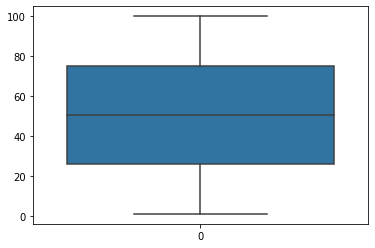

In [8]:
sns.boxplot(df_sales_data_Outlier['item_id'])

In [ ]:
sns.boxplot(x = df_sales_data_Outlier['date'], 
            y = df_sales_data_Outlier['item_id'], 
            hue = df_sales_data_Outlier['price'])

In [ ]:
%matplotlib inline
(df_sales_data_Outlier['Sales']).hist()